In [102]:
#!/usr/bin/env python3

import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [103]:
rtk = './csv_1/1_rtk_pos.csv'
uav_pose = './csv_1/UAV_pose.csv'
filepath = [rtk, uav_pose]

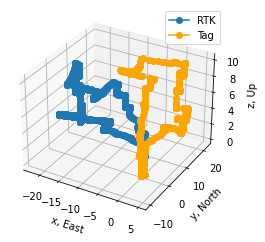

In [106]:
with open(rtk) as f:
    reader = csv.reader(f)
    data = [row for row in reader]
    #[緯度， 経度， 高度]
    ini_pos = [float(data[1][6]),
               float(data[1][7]),
               float(data[1][8])]
    # 1mあたり緯度 : 0.000008983148616
    # 1mあたり経度 : 0.000010966382364
    dx = 0.000008983148616
    dy = 0.000010966382364
    
    x = []
    y = []
    z = []
    for row in data[1:]:
        x_tmp = -(float(row[6]) - ini_pos[0])/dx
        y_tmp = (float(row[7]) - ini_pos[1])/dy
        z_tmp = float(row[8]) - ini_pos[2]

        x.append(x_tmp) #　緯度
        y.append(y_tmp) #　経度
        z.append(z_tmp) #　高度

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(x, y, z)
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    ax.set_zlabel('z, Up')
    ax.plot(x, y, z, linestyle='solid', marker='o', label='RTK')
    plt.legend()

    x_ = []
    y_ = []
    z_ = []

    with open(uav_pose) as f:
        reader = csv.reader(f)
        data = [row for row in reader]
        for row in data[1:]:
            if row[1] == '':
                continue
            x_.append(float(row[1]))
            y_.append(float(row[2]))
            z_.append(float(row[3]))

    ax.plot(x_, y_, z_, linestyle='solid', marker='o', label='Tag', color ='orange')
    plt.legend()
    
plt.show()

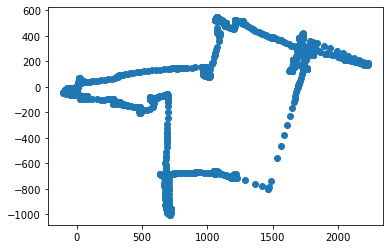

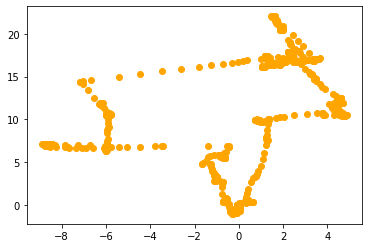